In [1]:
# install jupyter notebooks
# https://jupyter.org/install

In [1]:
# imports 
from optimiseCO import ClosedOrbitFinder
from probes_tune_calc import ProbesTuneCalc
from plot_dat import plot_field_map_and_orbit, plot_r_vs_phi, plot_phase_space, plot_field_map_and_orbit_withprobe
from read_dat import read_trackOrbit, read_trackOrbit, read_FieldMapRPHI, read_FieldMap, read_probe

import os
import shutil

In [2]:
# check opal is installed correctly
!source ~/Documents/FFA23-school/OPAL-2022.1/etc/profile.d/opal.sh && opal --version


Using:
    Prefix:       /home/carl/Documents/FFA23-school/OPAL-2022.1
    Compiler:     gcc
    Version:      10.4.0
    MPI:          openmpi
    Version:      4.1.4
2022.1.0


In [3]:
def write_opal_input_file(path, name, *args):
    with open(os.path.join(path, name), 'w') as f:
        f.write(
        '''
        //////////////////////////////////////////////////////////////////////////////
        // Input file for single bunch tracking                                     //
        //////////////////////////////////////////////////////////////////////////////
        Title,string="FETS-FFA test simulation using OPAL code";
        Option, ASCIIDUMP=TRUE;
        Option, ENABLEHDF5=FALSE;
        OPTION, PSDUMPFREQ=100000;
        Option, VERSION=10900;

        Option, ECHO=FALSE;

        
        ''')
        f.write(
        "Option, SPTDUMPFREQ="+str(args[1])+";"
        )
        f.write(
        '''
        ////////// CONSTANTS ////////////////////////////////////
        REAL DEGREE=PI/180.;
        REAL MM=1000.;
        REAL C_LIGHT=0.3; // m/ns

        ////////// MODULES ///////////////////////
        ''')
        f.write(
        "BOOL DO_MAGNET_FIELD_MAPS="+str(args[2])+";"
        )
        f.write(
        '''
        
        BOOL DO_RF=False;

        ////////// RING  ///////////////
        REAL R0=4.0;

                REAL E0=3;

        REAL P_MASS=938.272;
        REAL P_CHARGE=1.0;
        REAL P0=((E0+P_MASS)^2-P_MASS^2)^0.5;
        REAL N_CELLS=16;
        REAL RMIN=R0-1.0;
        REAL RMAX=R0+1.0;
        REAL FFA_CELL_LENGTH=2*PI/N_CELLS;
        REAL BFREQ=1;
        ''')
        f.write(
        "REAL NUM_TURNS ="+str(args[0])+";"
        )
        f.write(
        '''
        
        ////////// TRACKING ///////////////
        REAL STEP_SIZE=0.01; // m
        REAL BEAM_PHI_INIT=0.0;

        //////// MAIN MAGNETS ////////////////
        REAL BF=-0.34400191316643397;
        REAL BD=0.26356465577360527;
        REAL K_VAL=7.578216859923307;

        REAL LAMBDA=0.12;
        REAL SPIRAL_ANGLE=PI/8;
        // use the enge fringe file model
        REAL ENGE_0=0;
        REAL ENGE_1=3.42;

        REAL CELL_LENGTH = (2*PI/N_CELLS)*R0;
        REAL AZIMUTHAL_EXTENT=CELL_LENGTH;

        REAL D_START = (2.25)*(PI/180)*R0;
        REAL D_CENTRE_LENGTH = (2.25*PI/180)*R0;
        REAL D_END = D_START+D_CENTRE_LENGTH+(7.25)*(PI/180)*R0;
        
        REAL F_START = (6.25)*(PI/180)*R0; // in meters, ie an arc length 
        REAL F_CENTRE_LENGTH = (4.5*PI/180)*R0;
        REAL F_END = F_START+F_CENTRE_LENGTH;

        ringdef: RINGDEFINITION, HARMONIC_NUMBER=1, LAT_RINIT=4.0, LAT_PHIINIT=1,
                LAT_THETAINIT=0.0, BEAM_PHIINIT=0.0, BEAM_PRINIT=0.0,
                BEAM_RINIT=0.0, SYMMETRY=1.0, RFFREQ=1, IS_CLOSED=true;

        IF (DO_MAGNET_FIELD_MAPS) {

            DUMPFIELDS, X_START=-5.0, X_STEPS=708, DX=0.100/4.*2./3., Y_START=-5.0, Y_STEPS=708, DY=0.100/4.*2./3., Z_START=0.001, Z_STEPS=1, DZ=0.100, FILE_NAME="FieldMapXY.dat";
            DUMPEMFIELDS, COORDINATE_SYSTEM=CYLINDRICAL, R_START=R0-0.1*R0, R_STEPS=225, DR=0.005, PHI_START=0., PHI_STEPS=1075, DPHI=0.001, Z_START=0, Z_STEPS=1, DZ=0.100, T_START=0, T_STEPS=1, DT=1., FILE_NAME="FieldMapRPHI.dat";

        }
        
        // Example of using macros in the input file
        // this macro calls the PROBE element
        BUILD_PROBE(NAME, ANGLE, DANGLE): MACRO {
            NAME: PROBE, xstart=RMIN*1000*cos(ANGLE),  xend=RMAX*1000*cos(ANGLE),  ystart=RMIN*1000*sin(ANGLE),  yend=RMAX*1000*sin(ANGLE);
        }


        REAL THIS_PROBE_PHI=0;
        BUILD_PROBE(Probe1, THIS_PROBE_PHI, 0);
        THIS_PROBE_PHI = EVAL(THIS_PROBE_PHI+FFA_CELL_LENGTH);
        BUILD_PROBE(Probe2, THIS_PROBE_PHI, 0);
        THIS_PROBE_PHI = EVAL(THIS_PROBE_PHI+FFA_CELL_LENGTH);
        BUILD_PROBE(Probe3, THIS_PROBE_PHI, 0);
        THIS_PROBE_PHI = EVAL(THIS_PROBE_PHI+FFA_CELL_LENGTH);
        BUILD_PROBE(Probe4, THIS_PROBE_PHI, 0);
        THIS_PROBE_PHI = EVAL(THIS_PROBE_PHI+FFA_CELL_LENGTH);
        BUILD_PROBE(Probe5, THIS_PROBE_PHI, 0);
        THIS_PROBE_PHI = EVAL(THIS_PROBE_PHI+FFA_CELL_LENGTH);
        BUILD_PROBE(Probe6, THIS_PROBE_PHI, 0);
        THIS_PROBE_PHI = EVAL(THIS_PROBE_PHI+FFA_CELL_LENGTH);
        BUILD_PROBE(Probe7, THIS_PROBE_PHI, 0);
        THIS_PROBE_PHI = EVAL(THIS_PROBE_PHI+FFA_CELL_LENGTH);
        BUILD_PROBE(Probe8, THIS_PROBE_PHI, 0);
        THIS_PROBE_PHI = EVAL(THIS_PROBE_PHI+FFA_CELL_LENGTH);
        BUILD_PROBE(Probe9, THIS_PROBE_PHI, 0);
        THIS_PROBE_PHI = EVAL(THIS_PROBE_PHI+FFA_CELL_LENGTH);
        BUILD_PROBE(Probe10, THIS_PROBE_PHI, 0);
        THIS_PROBE_PHI = EVAL(THIS_PROBE_PHI+FFA_CELL_LENGTH);
        BUILD_PROBE(Probe11, THIS_PROBE_PHI, 0);
        THIS_PROBE_PHI = EVAL(THIS_PROBE_PHI+FFA_CELL_LENGTH);
        BUILD_PROBE(Probe12, THIS_PROBE_PHI, 0);
        THIS_PROBE_PHI = EVAL(THIS_PROBE_PHI+FFA_CELL_LENGTH);
        BUILD_PROBE(Probe13, THIS_PROBE_PHI, 0);
        THIS_PROBE_PHI = EVAL(THIS_PROBE_PHI+FFA_CELL_LENGTH);
        BUILD_PROBE(Probe14, THIS_PROBE_PHI, 0);
        THIS_PROBE_PHI = EVAL(THIS_PROBE_PHI+FFA_CELL_LENGTH);
        BUILD_PROBE(Probe15, THIS_PROBE_PHI, 0);
        THIS_PROBE_PHI = EVAL(THIS_PROBE_PHI+FFA_CELL_LENGTH);
        BUILD_PROBE(Probe16, THIS_PROBE_PHI, 0);
        THIS_PROBE_PHI = EVAL(THIS_PROBE_PHI+FFA_CELL_LENGTH);

        probes: Line = (
            Probe1, Probe2, Probe3, Probe4,
            Probe5, Probe6, Probe7, Probe8,
            Probe9, Probe10, Probe11, Probe12,
            Probe13, Probe14, Probe15, Probe16
        );


        magnet_f_end: ASYMMETRIC_ENGE,
                    X0_START=F_CENTRE_LENGTH/2, X0_END=F_CENTRE_LENGTH/2,
                    LAMBDA_START=LAMBDA, LAMBDA_END=LAMBDA,
                    COEFFICIENTS_START={ENGE_0, ENGE_1},
                    COEFFICIENTS_END={ENGE_0, ENGE_1};

        f_magnet: ScalingFFAMagnet, B0=BF,
                                    R0=R0,
                                    FIELD_INDEX=K_VAL,
                                    TAN_DELTA=tan(SPIRAL_ANGLE),
                                    MAX_Y_POWER=4,
                                    END_FIELD_MODEL=magnet_f_end,
                                    RADIAL_NEG_EXTENT=0.8,
                                    RADIAL_POS_EXTENT=1.2,
                                    MAGNET_START=F_START,
                                    MAGNET_END=F_END, 
                                    HEIGHT=1,
                                    AZIMUTHAL_EXTENT=AZIMUTHAL_EXTENT;

        magnet_d_end: ASYMMETRIC_ENGE,
                    X0_START=D_CENTRE_LENGTH/2, X0_END=D_CENTRE_LENGTH/2,
                    LAMBDA_START=LAMBDA, LAMBDA_END=LAMBDA,
                    COEFFICIENTS_START={ENGE_0, ENGE_1},
                    COEFFICIENTS_END={ENGE_0, ENGE_1};

        d_magnet: ScalingFFAMagnet, B0=BD,
                                    R0=R0,
                                    FIELD_INDEX=K_VAL,
                                    TAN_DELTA=tan(SPIRAL_ANGLE),
                                    MAX_Y_POWER=4,
                                    END_FIELD_MODEL=magnet_d_end,
                                    RADIAL_NEG_EXTENT=0.8,
                                    RADIAL_POS_EXTENT=1.2,
                                    MAGNET_START=D_START,
                                    MAGNET_END=D_END,
                                    HEIGHT=1,
                                    AZIMUTHAL_EXTENT=AZIMUTHAL_EXTENT;


        ////////////////////////// RF CAVITY ///////////////////////////

        REAL FFA_RF_VOLTAGE=10; // [kV] total field in the FFA
        REAL FFA_RF_PHASE=1.90861500533; // [rad] RF phase
        REAL FFA_RF_FREQ_0=0.936565887561; // [MHz]
        REAL FFA_RF_FREQ_1=2.07316363698e-06; // [MHz/ns^1]
        REAL FFA_RF_FREQ_2=-4.82372209641e-13; // [MHz/ns^2]
        REAL FFA_RF_FREQ_3=0.0; // [MHz/ns^3]
        REAL MILLIMETRE = 1;

        rf_frequency: POLYNOMIAL_TIME_DEPENDENCE, P0=FFA_RF_FREQ_0, P1=FFA_RF_FREQ_1, P2=FFA_RF_FREQ_2, P3=FFA_RF_FREQ_3;
        rf_amplitude: POLYNOMIAL_TIME_DEPENDENCE, P0=FFA_RF_VOLTAGE/10; // V*1e-1 MV/m, 10 mm long cavity => V kV total
        rf_phase: POLYNOMIAL_TIME_DEPENDENCE, P0=FFA_RF_PHASE;
        cavity_drift: LOCAL_CARTESIAN_OFFSET, end_position_x=-0.010*MILLIMETRE, end_position_y=0.*MILLIMETRE, end_normal_x=1.*MILLIMETRE, end_normal_y=0.*MILLIMETRE; // go back to start of cavity
        rf_cavity: VARIABLE_RF_CAVITY, PHASE_MODEL="RF_PHASE", AMPLITUDE_MODEL="RF_AMPLITUDE", FREQUENCY_MODEL="RF_FREQUENCY", L=0.010*MILLIMETRE, HEIGHT=1.*MILLIMETRE, WIDTH=3.*MILLIMETRE;

        /////////////////////////// SIMULATION PARAMS //////////////////

        cell: Line = (f_magnet, d_magnet);
        l1: Line = (ringdef, probes,
                    cell,cell,cell,cell,cell,cell,cell,cell,cell,cell,cell,cell,cell,cell,cell,cell);

        IF (DO_RF) {
                cavity: Line = (cavity_drift, rf_cavity);
                cell: Line = (f_magnet, d_magnet);
                l1: Line = (ringdef, probes,
                        cell,cell,cell,cell,cell,cell,cell,cell,cell,cell,cell,cell,cell,cell,cell,cell,
                         cavity);
        } 


        REAL B_FREQ=1; // 1 MHz
        REAL SPEED=C_LIGHT*(P0/(E0+P_MASS));
        REAL STEP_SIZE_NS=STEP_SIZE/SPEED;
        REAL STEPS_PER_TURN=1000/STEP_SIZE_NS/B_FREQ; // (this is really steps per B_FREQ)

        ''')
        f.write(
        'Dist1: DISTRIBUTION, TYPE=fromfile, FNAME="'+args[3]+'", INPUTMOUNITS=NONE;')
        f.write(
        '''

        Fs1:FIELDSOLVER, FSTYPE=None, MX=8, MY=8, MT=8,
                PARFFTX=true, PARFFTY=true, PARFFTT=false,
                BCFFTX=open, BCFFTY=open, BCFFTT=open, BBOXINCR=2;

        beam1: BEAM, PARTICLE=PROTON, pc=P0*1e-3, NPART=1, BCURRENT=0, CHARGE=P_CHARGE, mass=P_MASS*1e-3, BFREQ=BFREQ;TRACK, LINE=l1, BEAM=beam1, MAXSTEPS=2850*NUM_TURNS, STEPSPERTURN=STEPS_PER_TURN;
        
        RUN, METHOD="CYCLOTRON-T", BEAM=beam1, FIELDSOLVER=Fs1, DISTRIBUTION=Dist1;
        ENDTRACK;
        STOP;


        '''
        )

In [4]:
# run opal for 10 turns
                    # path to input, inputfile name, num turns, create trackorbit, write fieldmap,    input dist
write_opal_input_file(os.getcwd(),   "DF_lattice",   10,              1,               True,       "dist.dat")
   
# write input distribution file - just guess 4m as starting coordinate for now
with open(os.path.join(os.getcwd(), "dist.dat"), 'w') as f:
    f.write('1\n') # 1 particle
    f.write(str(4.0)+ ' '+str(0.0)+' '+ str(0.0)+ ' '+str(0.0)+' '+ str(0.0)+' '+ str(0.0))
    f.close()


# run opal
!source ~/Documents/FFA23-school/OPAL-2022.1/etc/profile.d/opal.sh && opal DF_lattice

Using:
    Prefix:       /home/carl/Documents/FFA23-school/OPAL-2022.1
    Compiler:     gcc
    Version:      10.4.0
    MPI:          openmpi
    Version:      4.1.4
OPAL>                ____  _____       ___ 
OPAL>               / __ \|  __ \ /\   | | 
OPAL>              | |  | | |__) /  \  | |
OPAL>              | |  | |  ___/ /\ \ | |
OPAL>              | |__| | |  / ____ \| |____
OPAL>               \____/|_| /_/    \_\______|
OPAL> 
OPAL> This is OPAL (Object Oriented Parallel Accelerator Library) Version 2022.1.0
OPAL>             git rev. a4e0e14466557289b4f7a843fb9eb72700ff1992
OPAL> 
OPAL> 
OPAL>                      (c) PSI, http://amas.web.psi.ch
OPAL> 
OPAL> 
OPAL> The optimiser (former opt-Pilot) is integrated 
OPAL> 
OPAL> Please send cookies, goodies or other motivations (wine and beer ... ) 
OPAL> to the OPAL developers opal@lists.psi.ch
OPAL> 
OPAL> Time: 15:03:14 date: 06/09/2023
OPAL> 
OPAL> * Reading input stream 'DF_lattice'
Ippl> No solver attached
Ippl> * Creat

OPAL> * ************* D U M P  E M  F I E L D S ****************************************** 
OPAL> * File name: 'FieldMapRPHI.dat'
OPAL> * Coordinate system: CYLINDRICAL
OPAL> * R_START   = 3.6 [m]
OPAL> * DR        = 0.005 [m]
OPAL> * R_STEPS   = 225
OPAL> * PHI_START = 0 [rad]
OPAL> * DPHI      = 0.001 [rad]
OPAL> * PHI_STEPS = 1075
OPAL> * Z_START   = 0 [m]
OPAL> * DZ        = 0.1 [m]
OPAL> * Z_STEPS   = 1
OPAL> * T_START   = 0 [ns]
OPAL> * DT        = 1 [ns]
OPAL> * T_STEPS   = 1
OPAL> * ********************************************************************************** 
OPAL> 
OPAL> * 4th order Runge-Kutta integrator
OPAL> 
OPAL> * Before repartition: min local particle number: 1
OPAL> *                     max local particle number: 1
OPAL> 
OPAL> * After repartition:  min local particle number: 1
OPAL> *                     max local particle number: 1
OPAL> 
OPAL> * *********************** Bunch information in local frame: ************************
OPAL> * ************** B U N C H

mean radius =  4.078908492431343


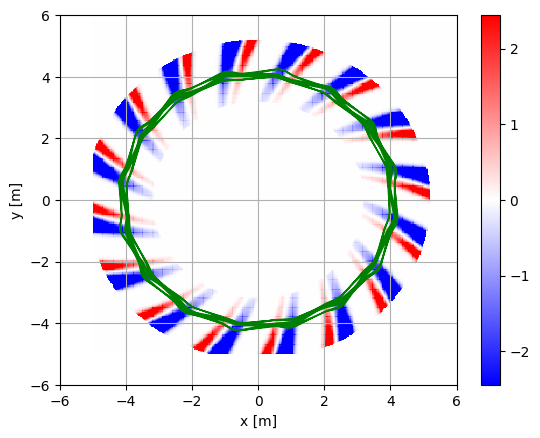

In [5]:
# plot the results
root_path = os.getcwd()
fieldmap_path = os.path.join(root_path, "data/")
track_filename = "DF_lattice" + '-trackOrbit.dat'

fieldmap_filename = "FieldMapXY.dat"
fieldmap_cyclindrical_filename =  "FieldMapRPHI.dat"

# read the track orbit
trackOrbit_df = read_trackOrbit(filepath=root_path
                                , filename=track_filename)

#read the field maps
FieldMap_df = read_FieldMap(fieldmap_path, filename=fieldmap_filename)
FieldMapRPHI_df = read_FieldMapRPHI(fieldmap_path, filename=fieldmap_cyclindrical_filename)

#plot
plot_field_map_and_orbit(FieldMap_df, trackOrbit_df)

In [6]:
# the orbit above is clearly not a closed orbit
# now use the closed orbit finder to optimise the inital input distribution to find a closed orbit at this energy

# input dist file for Co at 3MeV
CO_distribution_filename = "CO_coords_3MeV.dat"
with open(os.path.join(os.getcwd(), CO_distribution_filename), 'w') as f:
    f.write('1\n') # 1 particle
    f.write(str(4.0)+ ' '+str(0.0)+' '+ str(0.0)+ ' '+str(0.0)+' '+ str(0.0)+' '+ str(0.0))
    f.close()
    
    
# re write the input file with updated params
# the CO finder should be run with num turns set to 1 and there is no need to generate a trackOrbit or field maps
write_opal_input_file(os.getcwd(), "DF_lattice", 1, 0, False, CO_distribution_filename)

# Jupyter does not like calling opal from within python so annoyingly we need to run the closed orbit finder manually
print("*** RUN optimiseCO.py ***")


*** RUN optimiseCO.py ***


In [7]:
# view the closed orbit coords the optimiser arrived at

with open(CO_distribution_filename) as f:
    lines = f.readlines()
    f.close()
vals = lines[1].split()
co_xcoords = float(vals[0])
co_pxcoords = float(vals[1])
print(co_xcoords)
print(co_pxcoords)

4.06927563930915
-0.007776424981561973


In [8]:
# now run OPAL anf check the closed orbit
# run opal for 50 turns
# 50 turns will be more than enough for a tune calculation
                    # path to input, inputfile name, num turns, create trackorbit, write fieldmap,    input dist
write_opal_input_file(os.getcwd(),   "DF_lattice",   50,              1,               True,       CO_distribution_filename)


# run opal
!source ~/Documents/FFA23-school/OPAL-2022.1/etc/profile.d/opal.sh && opal DF_lattice

Using:
    Prefix:       /home/carl/Documents/FFA23-school/OPAL-2022.1
    Compiler:     gcc
    Version:      10.4.0
    MPI:          openmpi
    Version:      4.1.4
OPAL>                ____  _____       ___ 
OPAL>               / __ \|  __ \ /\   | | 
OPAL>              | |  | | |__) /  \  | |
OPAL>              | |  | |  ___/ /\ \ | |
OPAL>              | |__| | |  / ____ \| |____
OPAL>               \____/|_| /_/    \_\______|
OPAL> 
OPAL> This is OPAL (Object Oriented Parallel Accelerator Library) Version 2022.1.0
OPAL>             git rev. a4e0e14466557289b4f7a843fb9eb72700ff1992
OPAL> 
OPAL> 
OPAL>                      (c) PSI, http://amas.web.psi.ch
OPAL> 
OPAL> 
OPAL> The optimiser (former opt-Pilot) is integrated 
OPAL> 
OPAL> Please send cookies, goodies or other motivations (wine and beer ... ) 
OPAL> to the OPAL developers opal@lists.psi.ch
OPAL> 
OPAL> Time: 15:05:44 date: 06/09/2023
OPAL> 
OPAL> * Reading input stream 'DF_lattice'
Ippl> No solver attached
Ippl> * Creat

OPAL> * ************* D U M P  E M  F I E L D S ****************************************** 
OPAL> * File name: 'FieldMapRPHI.dat'
OPAL> * Coordinate system: CYLINDRICAL
OPAL> * R_START   = 3.6 [m]
OPAL> * DR        = 0.005 [m]
OPAL> * R_STEPS   = 225
OPAL> * PHI_START = 0 [rad]
OPAL> * DPHI      = 0.001 [rad]
OPAL> * PHI_STEPS = 1075
OPAL> * Z_START   = 0 [m]
OPAL> * DZ        = 0.1 [m]
OPAL> * Z_STEPS   = 1
OPAL> * T_START   = 0 [ns]
OPAL> * DT        = 1 [ns]
OPAL> * T_STEPS   = 1
OPAL> * ********************************************************************************** 
OPAL> 
OPAL> * 4th order Runge-Kutta integrator
OPAL> 
OPAL> * Before repartition: min local particle number: 1
OPAL> *                     max local particle number: 1
OPAL> 
OPAL> * After repartition:  min local particle number: 1
OPAL> *                     max local particle number: 1
OPAL> 
OPAL> * *********************** Bunch information in local frame: ************************
OPAL> * ************** B U N C H

mean radius =  4.090991640301915


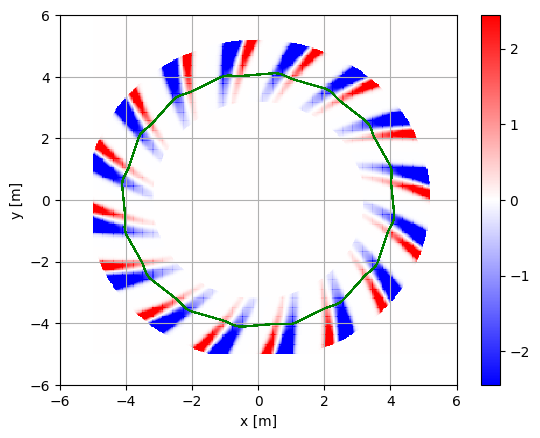

In [9]:
# plot the results
root_path = os.getcwd()
fieldmap_path = os.path.join(root_path, "data/")
track_filename = "DF_lattice" + '-trackOrbit.dat'

fieldmap_filename = "FieldMapXY.dat"
fieldmap_cyclindrical_filename =  "FieldMapRPHI.dat"

# read the track orbit
trackOrbit_df = read_trackOrbit(filepath=root_path
                                , filename=track_filename)

#read the field maps
FieldMap_df = read_FieldMap(fieldmap_path, filename=fieldmap_filename)
FieldMapRPHI_df = read_FieldMapRPHI(fieldmap_path, filename=fieldmap_cyclindrical_filename)

#plot

plot_field_map_and_orbit(FieldMap_df, trackOrbit_df)

In [10]:
# to caclulate the tune we need the closed orbit as a reference and a a slightly perturbed orbit

# first move the probe files with the closed orbit information to a seperate directory

path = os.getcwd()
path_to_closed_orbit_probes = os.path.join(path,"co_dir_test/")
print("path to closed orbit probes = ",path_to_closed_orbit_probes)
if not os.path.isdir(path_to_closed_orbit_probes):
    os.mkdir(path_to_closed_orbit_probes)
    
for x in os.listdir(path):
    if x.endswith(".loss"):
        shutil.copyfile(x, path_to_closed_orbit_probes+x) 
 

    

path to closed orbit probes =  /home/carl/Documents/FFA23-school/co_dir_test/


In [11]:
# now re run opal bit with a slightly perturbed orbit
pert_distribution_filename = "perturbed_coords_3MeV.dat"
with open(os.path.join(os.getcwd(), pert_distribution_filename), 'w') as f:
    f.write('1\n') # 1 particle
    f.write(str(co_xcoords +1e-3)+ ' '+str(co_pxcoords)+' '+ str(0.0)+ ' '+str(0.0)+' '+ str(1e-3)+' '+ str(0.0))
    f.close()
    
# re write the input file with perturbed distribution file
write_opal_input_file(os.getcwd(), "DF_lattice", 50, 1, False, pert_distribution_filename)

# run opal 
!source ~/Documents/FFA23-school/OPAL-2022.1/etc/profile.d/opal.sh && opal DF_lattice

Using:
    Prefix:       /home/carl/Documents/FFA23-school/OPAL-2022.1
    Compiler:     gcc
    Version:      10.4.0
    MPI:          openmpi
    Version:      4.1.4
OPAL>                ____  _____       ___ 
OPAL>               / __ \|  __ \ /\   | | 
OPAL>              | |  | | |__) /  \  | |
OPAL>              | |  | |  ___/ /\ \ | |
OPAL>              | |__| | |  / ____ \| |____
OPAL>               \____/|_| /_/    \_\______|
OPAL> 
OPAL> This is OPAL (Object Oriented Parallel Accelerator Library) Version 2022.1.0
OPAL>             git rev. a4e0e14466557289b4f7a843fb9eb72700ff1992
OPAL> 
OPAL> 
OPAL>                      (c) PSI, http://amas.web.psi.ch
OPAL> 
OPAL> 
OPAL> The optimiser (former opt-Pilot) is integrated 
OPAL> 
OPAL> Please send cookies, goodies or other motivations (wine and beer ... ) 
OPAL> to the OPAL developers opal@lists.psi.ch
OPAL> 
OPAL> Time: 15:06:47 date: 06/09/2023
OPAL> 
OPAL> * Reading input stream 'DF_lattice'
Ippl> No solver attached
Ippl> * Creat

OPAL> * SPT: Finished turn 1
OPAL> * SPT: Finished turn 2
OPAL> * SPT: Finished turn 3
OPAL> * SPT: Finished turn 4
OPAL> * SPT: Finished turn 5
OPAL> * SPT: Finished turn 6
OPAL> * SPT: Finished turn 7
OPAL> * SPT: Finished turn 8
OPAL> * SPT: Finished turn 9
OPAL> * SPT: Finished turn 10
OPAL> * SPT: Finished turn 11
OPAL> * SPT: Finished turn 12
OPAL> * SPT: Finished turn 13
OPAL> * SPT: Finished turn 14
OPAL> * SPT: Finished turn 15
OPAL> * SPT: Finished turn 16
OPAL> * SPT: Finished turn 17
OPAL> * SPT: Finished turn 18
OPAL> * SPT: Finished turn 19
OPAL> * SPT: Finished turn 20
OPAL> * SPT: Finished turn 21
OPAL> * SPT: Finished turn 22
OPAL> * SPT: Finished turn 23
OPAL> * SPT: Finished turn 24
OPAL> * SPT: Finished turn 25
OPAL> * SPT: Finished turn 26
OPAL> * SPT: Finished turn 27
OPAL> * SPT: Finished turn 28
OPAL> * SPT: Finished turn 29
OPAL> * SPT: Finished turn 30
OPAL> * SPT: Finished turn 31
OPAL> * SPT: Finished turn 32
OPAL> * SPT: Finished turn 33
OPAL> * SPT: Finish

In [12]:
# now finally calculate the tunes using the closed orbit probes and the probes from the perturbed particle 

print("path to closed orbit probes = ",path_to_closed_orbit_probes)

ProbesTuneCalc(16, path, path_to_closed_orbit_probes).main()
        

path to closed orbit probes =  /home/carl/Documents/FFA23-school/co_dir_test/
number of particles =  1
num_lost_particles =  0
Using FFT
cell tunex, =  [0.2072480181200453]
cell tunez =  [0.11551528878822198]
